In [54]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
import geopandas as gpd
%matplotlib inline


In [56]:
data = pd.read_csv("/Users/bakhita/Downloads/Kaggle/earthquakes in indonesia/katalog_gempa.csv")
data.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data Cleaning

In [57]:
data.dtypes


tgl         object
ot          object
lat        float64
lon        float64
depth        int64
mag        float64
remark      object
strike1    float64
dip1       float64
rake1      float64
strike2    float64
dip2       float64
rake2      float64
dtype: object

In [58]:
data.isnull().sum()


tgl            0
ot             0
lat            0
lon            0
depth          0
mag            0
remark         0
strike1    90152
dip1       90152
rake1      90152
strike2    90152
dip2       90152
rake2      90152
dtype: int64

##### Drop the variables with missing values

In [59]:
data = data.drop(['ot','strike1', 'dip1', 'rake1', 'strike2', 'dip2', 'rake2'], axis=1)


In [60]:
data['tgl'] = pd.to_datetime(data['tgl'])


In [61]:
data

,tgl,lat,lon,depth,mag,remark
0,2008-11-01,-9.18,119.06,10,4.9,Sumba Region - Indonesia
1,2008-11-01,-6.55,129.64,10,4.6,Banda Sea
2,2008-11-01,-7.01,106.63,121,3.7,Java - Indonesia
3,2008-11-01,-3.30,127.85,10,3.2,Seram - Indonesia
4,2008-11-01,-6.41,129.54,70,4.3,Banda Sea
...,...,...,...,...,...,...
92882,2023-01-26,3.24,127.18,10,4.0,Talaud Islands - Indonesia
92883,2023-01-26,2.70,127.10,10,3.9,Northern Molucca Sea
92884,2023-01-26,-7.83,121.07,10,3.8,Flores Sea
92885,2023-01-26,3.00,127.16,10,4.1,Northern Molucca Sea


## EDA

### Strongest Earthquake

In [62]:
strongest_earthquake = data.nlargest(10, 'mag')
strongest_earthquake

,tgl,lat,lon,depth,mag,remark
345,2009-01-03,-0.54,132.89,17,7.9,Irian Jaya Region - Indonesia
2472,2009-09-30,-0.80,99.88,81,7.7,Southern Sumatra - Indonesia
5480,2010-04-06,2.24,97.11,29,7.7,Northern Sumatra - Indonesia
25283,2016-03-02,-4.92,94.31,19,7.7,Southwest of Sumatra - Indonesia
25284,2016-03-02,-4.92,94.31,19,7.7,Southwest of Sumatra - Indonesia
331,2009-01-03,-0.82,133.41,51,7.5,Irian Jaya Region - Indonesia
45620,2018-09-28,-0.22,119.85,10,7.5,Minahassa Peninsula - Sulawesi
45621,2018-09-28,-0.22,119.85,10,7.5,Minahassa Peninsula - Sulawesi
92087,2023-01-09,-7.38,130.18,122,7.5,Tanimbar Islands Reg. - Indonesia
92088,2023-01-09,-7.38,130.18,122,7.5,Tanimbar Islands Reg. - Indonesia


In [46]:
total_earthquake = data.shape[0]
total_earthquake_per_day = data.groupby(data['tgl'].dt.date).size()

average_earthquake_per_day = total_earthquake_per_day.mean()

print('Total amount of Earthquakes:', total_earthquake)
print('Average Earthquakes per day:', average_earthquake_per_day)

Total amount of Earthquakes: 92887
Average Earthquakes per day: 21.053263825929285


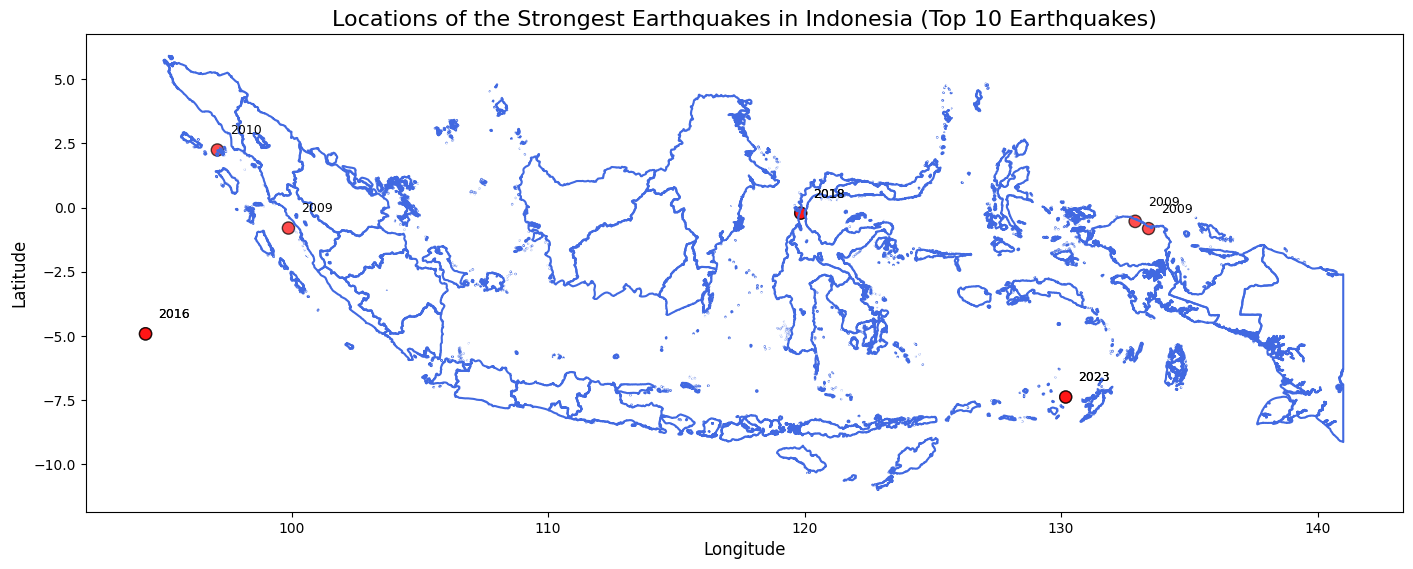

In [63]:
# Filepath to the map of Indonesia (used to get the Indonesia map only)
filename = '/Users/bakhita/Downloads/Kaggle/earthquakes in indonesia/indonesia-province-jml-penduduk.json' 
indonesia_map = gpd.read_file(filename)

# Select the 10 strongest earthquakes based on magnitude from the dataset 'strongest_earthquakes'
strongest_earthquakes = data.nlargest(10, 'mag')

# Extract the year from the date column
strongest_earthquakes['year'] = strongest_earthquakes['tgl'].dt.year

# Read the map of Indonesia
filename = '/Users/bakhita/Downloads/Kaggle/earthquakes in indonesia/indonesia-province-jml-penduduk.json'
indonesia_map = gpd.read_file(filename)

# Plot the map of Indonesia
fig, ax = plt.subplots(figsize=(17, 13))
indonesia_map.boundary.plot(ax=ax, edgecolor='royalblue')

# Plot the locations of the 10 strongest earthquakes based on latitude and longitude
scatter = ax.scatter(strongest_earthquakes['lon'], strongest_earthquakes['lat'], 
                     color='red', s=strongest_earthquakes['mag'] * 10, 
                     alpha=0.7, edgecolors='black')

# Add year annotations at the earthquake locations
for i, row in strongest_earthquakes.iterrows():
    ax.text(row['lon'] + 0.5, row['lat'] + 0.5,  # Offset the label slightly to the right and above
            str(row['year']), fontsize=9, ha='left', color='black', va='bottom')  # Adjust vertical position with 'bottom' to reduce overlap

# Add title and labels to the plot
plt.title("Locations of the Strongest Earthquakes in Indonesia (Top 10 Earthquakes)", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()
